In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
file_path = 'file.xlsx'
data = pd.read_excel(file_path)

In [26]:
data.head()

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Shipment ID            20000 non-null  object        
 1   Origin                 20000 non-null  object        
 2   Destination            20000 non-null  object        
 3   Shipment Date          20000 non-null  datetime64[ns]
 4   Planned Delivery Date  20000 non-null  datetime64[ns]
 5   Actual Delivery Date   20000 non-null  datetime64[ns]
 6   Vehicle Type           19403 non-null  object        
 7   Distance (km)          20000 non-null  int64         
 8   Weather Conditions     20000 non-null  object        
 9   Traffic Conditions     20000 non-null  object        
 10  Delayed                20000 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1.7+ MB


In [28]:
data.isnull().sum()

Shipment ID                0
Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64

In [29]:
data['Vehicle Type'].value_counts()

Vehicle Type
Lorry        4878
Truck        4860
Trailer      4838
Container    4827
Name: count, dtype: int64

In [30]:
unique_values = data['Vehicle Type'].dropna().unique()
unique_values

array(['Trailer', 'Truck', 'Container', 'Lorry'], dtype=object)

In [31]:
import random
data['Vehicle Type'] = data['Vehicle Type'].apply(
    lambda x: random.choice(unique_values) if pd.isnull(x) else x
)

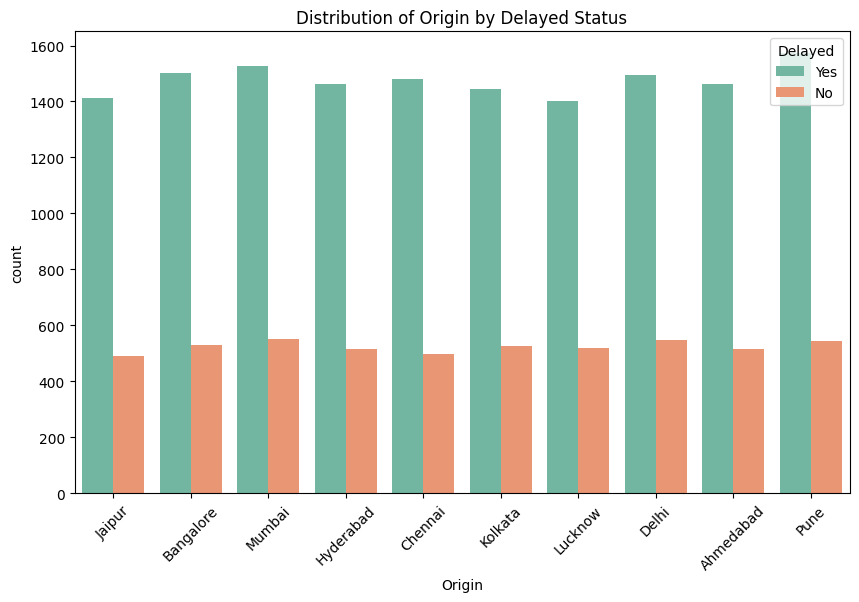

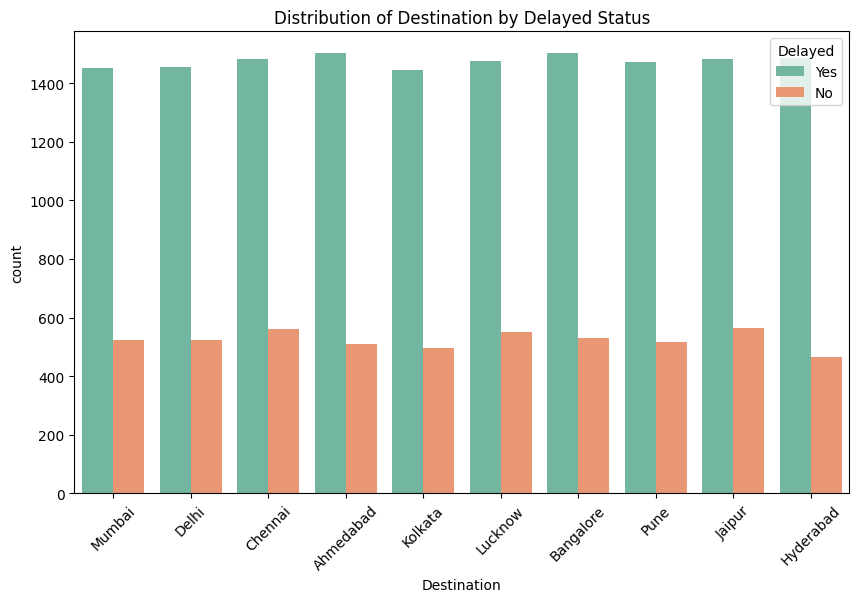

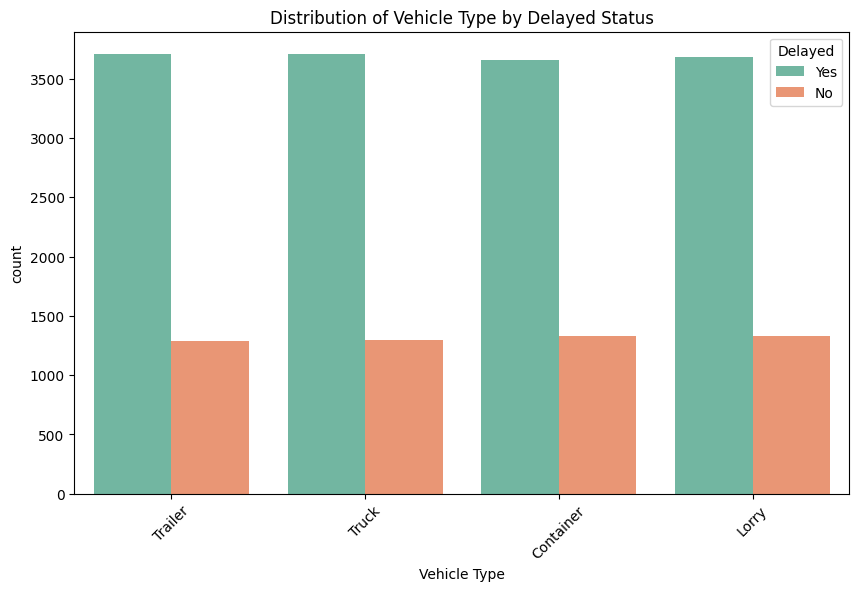

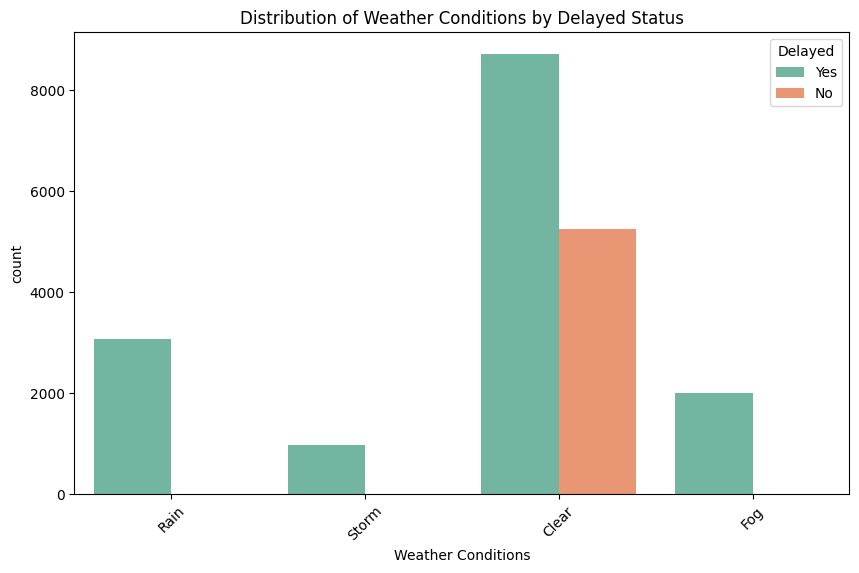

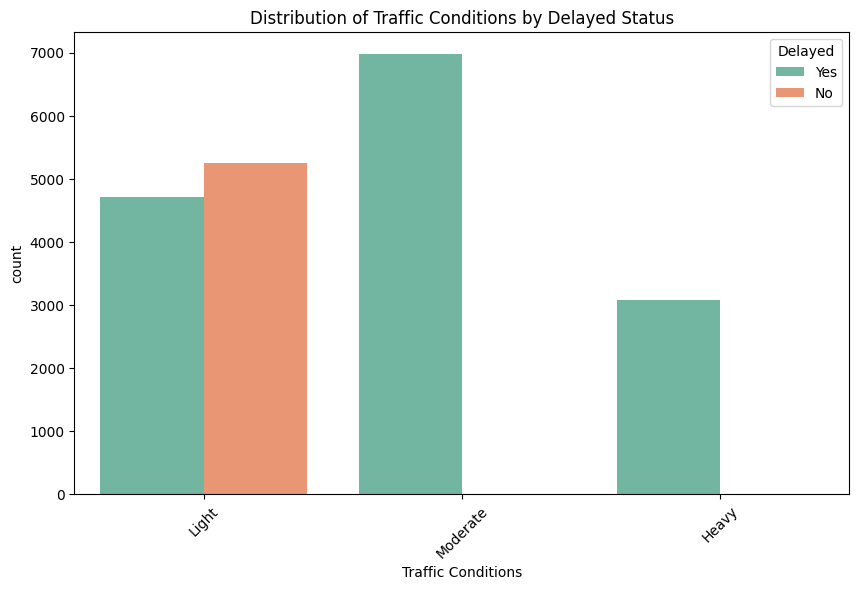

In [32]:
categorical_columns = ['Origin', 'Destination', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, hue='Delayed', palette='Set2')
    plt.title(f'Distribution of {col} by Delayed Status')
    plt.xticks(rotation=45)
    plt.show()


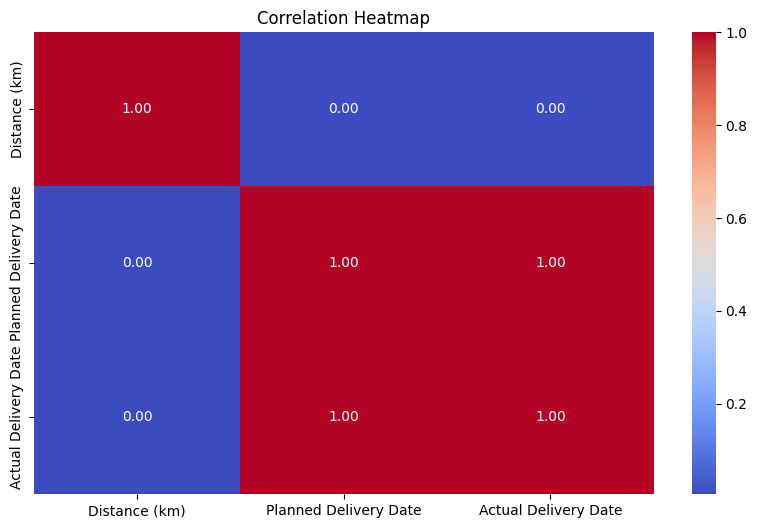

In [33]:
correlation_matrix = data[['Distance (km)', 'Planned Delivery Date', 'Actual Delivery Date']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

encoder_weather = LabelEncoder()
encoder_traffic = LabelEncoder()

data['Weather Conditions'] = encoder_weather.fit_transform(data['Weather Conditions'])
data['Traffic Conditions'] = encoder_traffic.fit_transform(data['Traffic Conditions'])

# Save the encoders
joblib.dump(encoder_weather, 'encoder_weather.pkl')
joblib.dump(encoder_traffic, 'encoder_traffic.pkl')

print("Encoder Weather Classes:", encoder_weather.classes_)
print("Encoder Traffic Classes:", encoder_traffic.classes_)


Encoder Weather Classes: ['Clear' 'Fog' 'Rain' 'Storm']
Encoder Traffic Classes: ['Heavy' 'Light' 'Moderate']


In [35]:
X = data[['Weather Conditions', 'Traffic Conditions']]
y = data['Delayed'].map({'Yes': 1, 'No': 0})

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")


Accuracy: 0.9115
Precision: 1.0
Recall: 0.879632777966678
F1 Score: 0.9359623733719248


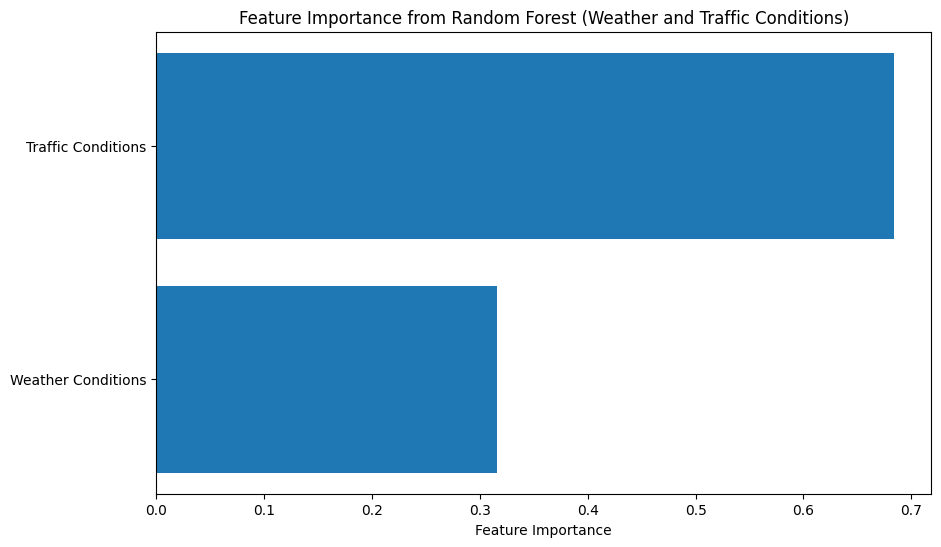

In [39]:
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest (Weather and Traffic Conditions)')
plt.show()

In [40]:
import joblib

joblib.dump(model, 'shipment_delay_model.pkl')


['shipment_delay_model.pkl']